In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import time
import pandas_datareader
import scipy.stats as st
import matplotlib.dates as mdates

In [21]:
symbols = ['FDX', 'UPS', 'TGT','GM','TM','LUV','DAL','TWTR','FB','WMT']
#stockfinal= pd.read_csv("outputData/stocks.csv")
stockfinal=pd.DataFrame()
stock=[]
for ticker in symbols:
    stock=yf.download(ticker, start="2019-01-01", end="2020-12-31")
    if len(stock)!=0:
        stock["Name"]=ticker
        stockfinal=stockfinal.append(stock, sort=False)

stockfinal.to_csv("outputData/stocks.csv", encoding = 'utf-8')
stockfinal

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2019-01-02,158.520004,163.380005,157.570007,163.190002,158.252838,2125700,FDX
2019-01-03,161.789993,163.070007,156.960007,157.190002,152.434372,3033300,FDX
2019-01-04,160.199997,164.979996,159.500000,164.429993,159.455338,2938600,FDX
2019-01-07,164.889999,166.850006,162.149994,166.729996,161.685776,2989400,FDX
2019-01-08,168.699997,169.419998,165.309998,167.020004,161.966980,2610700,FDX
...,...,...,...,...,...,...,...
2020-12-23,143.539993,144.220001,142.300003,143.220001,143.220001,6810200,WMT
2020-12-24,143.539993,144.389999,143.179993,143.500000,143.500000,3018200,WMT
2020-12-28,144.039993,145.300003,143.330002,145.220001,145.220001,6448300,WMT


In [22]:
stock_group=stockfinal.groupby("Name")
stock_describe=stock_group["Close"].describe()
stock_describe

,count,mean,std,min,25%,50%,75%,max
Name,,,,,,,,
DAL,504.0,45.129881,13.342683,19.190001,31.199999,50.330000,57.187500,63.160000
FB,504.0,208.017579,39.598348,131.740005,179.985001,196.760002,235.744995,303.910004
FDX,504.0,176.419246,46.649264,90.489998,151.082500,163.309998,184.032497,301.450012
GM,504.0,34.000179,6.110743,16.799999,29.827500,35.840000,38.437500,46.459999
LUV,504.0,46.537341,9.122355,23.870001,38.265000,50.425001,53.852499,58.540001
TGT,504.0,112.107957,29.655817,65.529999,86.197500,110.540001,125.820002,179.820007
TM,504.0,130.135397,8.756029,108.500000,122.907503,129.389999,136.574997,155.089996
TWTR,504.0,36.362024,6.372567,22.000000,31.607501,35.765001,40.360001,55.869999
UPS,504.0,120.197064,24.729566,86.169998,102.074997,114.375000,121.247498,176.539993


In [36]:
stockfinal=stockfinal.reset_index()
mins=stock_group["Close"].min()
maxs=stock_group["Close"].max()
mins_data=pd.DataFrame()
maxs_data=pd.DataFrame()
for ticker in symbols:
    mins_data=mins_data.append(stockfinal[(stockfinal["Name"]==ticker) & (stockfinal["Close"]==mins[ticker])])
    maxs_data=maxs_data.append(stockfinal[(stockfinal["Name"]==ticker) & (stockfinal["Close"]==maxs[ticker])])
mins_data

,index,Date,Open,High,Low,Close,Adj Close,Volume,Name
302,302,2020-03-16,92.000000,99.870003,90.489998,90.489998,89.600357,4417400,FDX
804,804,2020-03-12,82.220001,92.440002,82.000000,86.169998,84.222221,9412800,UPS
1009,1009,2019-01-03,66.129997,66.629997,65.410004,65.529999,62.248390,4562200,TGT
1816,1816,2020-03-18,18.830000,19.049999,14.330000,16.799999,16.799999,39591100,GM
2318,2318,2020-03-16,110.000000,112.510002,108.010002,108.500000,106.602600,409400,TM
2865,2865,2020-05-15,24.370001,24.870001,23.750000,23.870001,23.870001,18679800,LUV
3369,3369,2020-05-15,18.969999,19.650000,18.620001,19.190001,19.190001,46861800,DAL
3832,3832,2020-03-18,22.950001,23.490000,20.000000,22.000000,22.000000,31012700,TWTR
4033,4033,2019-01-03,134.690002,137.169998,131.119995,131.740005,131.740005,22717900,FB
4537,4537,2019-01-03,93.209999,94.709999,92.699997,92.860001,89.522263,8277300,WMT


In [37]:
maxs_data

,index,Date,Open,High,Low,Close,Adj Close,Volume,Name
488,488,2020-12-08,298.000000,303.649994,297.720001,301.450012,300.776428,2889100,FDX
952,952,2020-10-12,174.860001,176.800003,174.210007,176.539993,175.469986,2274000,UPS
1488,1488,2020-11-25,177.729996,180.479996,177.350006,179.820007,179.820007,3780700,TGT
1991,1991,2020-11-24,45.910000,46.709999,45.070000,46.459999,46.459999,20048700,GM
2510,2510,2020-12-16,154.160004,155.479996,153.000000,155.089996,155.089996,266100,TM
2801,2801,2020-02-13,58.060001,58.689999,57.849998,58.540001,58.315563,2401800,LUV
3158,3158,2019-07-16,61.880001,63.259998,61.720001,63.160000,61.866245,10319700,DAL
3164,3164,2019-07-24,62.389999,63.439999,62.380001,63.160000,62.263969,5718800,DAL
4024,4024,2020-12-18,54.930000,56.080002,54.270000,55.869999,55.869999,20450300,TWTR
4448,4448,2020-08-26,284.000000,304.670013,284.000000,303.910004,303.910004,69015200,FB


In [39]:
def linear_reg(x,y,dfName,ab):
    ticker_df=stockfinal[stockfinal["Name"]==str(dfName)]
    date_num=ticker_df[x].map(dt.datetime.toordinal)
    slope, intercept, r_value, p_value, std_err=st.linregress(date_num,ticker_df[y])
    regression_value=date_num*slope+intercept
    plt.figure(figsize=(20, 10))
    plt.plot(ticker_df[x], ticker_df[y])
    plt.plot(ticker_df[x], regression_value, color='red')
    eq= f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(eq,ab, color='red', fontsize=16)
    plt.xlabel(x)
    plt.ylabel(y)
    t=f"Plot for {dfName} stock"
    plt.title(t)
    print(f"The r-value is: {r_value}")
    print(f"The p-value is: {p_value}")
    plt.show()

The r-value is: -0.3910429251917474
The p-value is: 7.315235775821704e-20


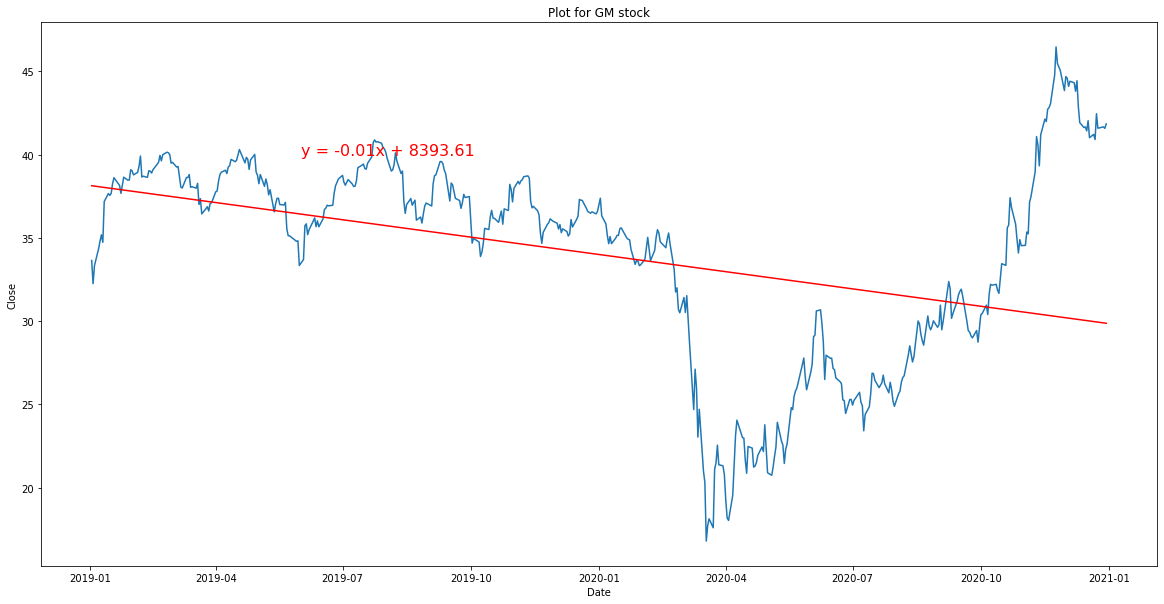

In [38]:
linear_reg("Date", "Close", "GM",(mdates.date2num(dt.datetime(2019,6,1)), 40))

The r-value is: -0.3910429251917474
The p-value is: 7.315235775821704e-20


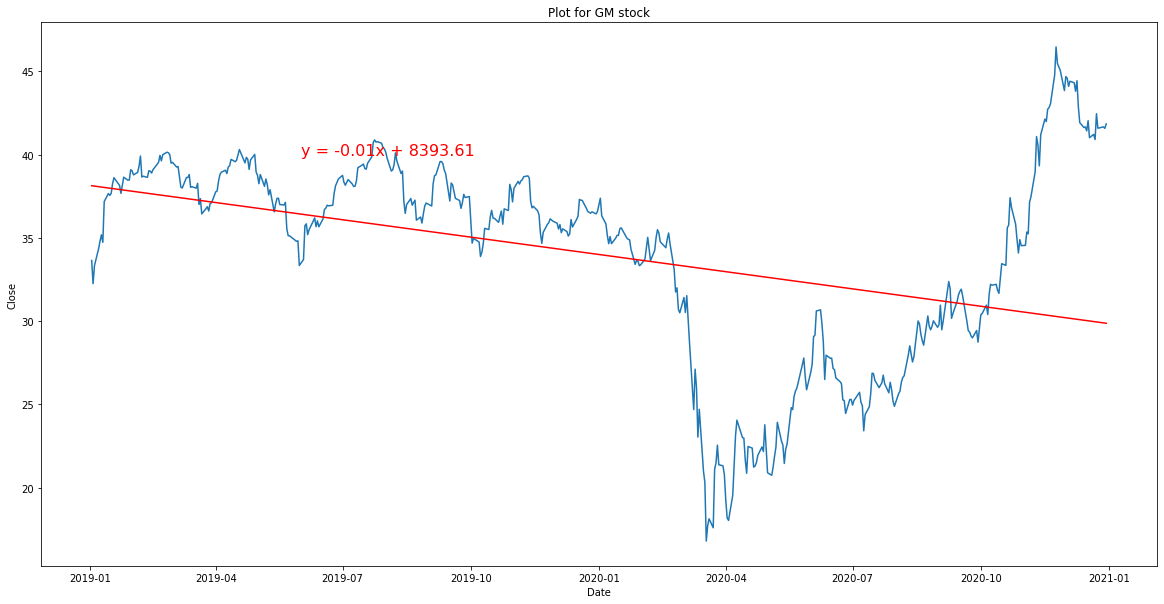